In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [4]:
%matplotlib inline

In [5]:
plt.rcParams["figure.figsize"] = (10, 5)

In [6]:
saved_style_state = matplotlib.rcParams.copy()

In [7]:
if os.path.isfile("ACT_Selected_Cancer_incidence_and_mortality.csv"):
    filepath = "ACT_Selected_Cancer_incidence_and_mortality.csv"
    print("loading from file")
else:
    filepath = "https://www.data.act.gov.au/Health/ACT-Selected-Cancer-incidence-and-mortality/a2ku-4dqc"
    print("loading from the internet")

cancer_data = pd.read_csv(filepath)
print("done")

loading from file
done


 # Data Project
 
 ### GitHub Username: RowanSakoulas
 ### zID: z5426730

# Cancer Incidences and Mortalities in ACT 1985 - 2019

In this project I explore the dataset and I identify the varying trends in the data of the cancer cases by looking into the differences between the cancer types and sexes. Later on I also look at a dataset of Tobacco Smoking in the ACT.

Introduction to the Dataset

In [8]:
cancer_data.head()

,CancerType,IncidenceMortality,year,sex,NumberOfCases,AgeAdjustedRate,IncidenceMortality_Sex
0,Bowel C18-C20,Incidence,1985,Male,50,79.9,Incidence Male
1,Bowel C18-C20,Incidence,1986,Male,29,48.8,Incidence Male
2,Bowel C18-C20,Incidence,1987,Male,52,78.3,Incidence Male
3,Bowel C18-C20,Incidence,1988,Male,48,63.7,Incidence Male
4,Bowel C18-C20,Incidence,1989,Male,53,74.2,Incidence Male


Scatterplot of 'Cancer Incidences by Type'

In [9]:
#removing the sex labelled as 'person' to decrease data ambiguity
cancer_male_female_incidence = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Male', 'Incidence Female'])]

#removing cancer from 'All sites' again to decrease ambiguity
cancer_incidences = cancer_male_female_incidence[cancer_male_female_incidence["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

#plotting bowel cancer
bowel_incidences = cancer_incidences[cancer_incidences["CancerType"].isin(["Bowel C18-C20"])]
lung_incidences = cancer_incidences[cancer_incidences["CancerType"].isin(["Lung C33, C34"])]
melanoma_incidences = cancer_incidences[cancer_incidences["CancerType"].isin(["Melanoma of skin C43"])]
breast_incidences = cancer_incidences[cancer_incidences["CancerType"].isin(["Breast C50"])]
prostate_incidences = cancer_incidences[cancer_incidences["CancerType"].isin(["Prostate C61"])]

def incidence_type():
    plt.scatter(bowel_incidences.year, bowel_incidences.NumberOfCases)
    plt.scatter(lung_incidences.year, lung_incidences.NumberOfCases)
    plt.scatter(melanoma_incidences.year, melanoma_incidences.NumberOfCases)
    plt.scatter(breast_incidences.year, breast_incidences.NumberOfCases)
    plt.scatter(prostate_incidences.year, prostate_incidences.NumberOfCases)
    plt.xlabel('Year', fontsize = 12)
    plt.ylabel('Cancer Incidences', fontsize = 12)
    plt.title('Cancer Incidences by Type', fontsize = 14, fontweight = "bold")
    plt.legend(['Bowel', 'Lung', 'Melanoma', 'Breast', 'Prostate'])


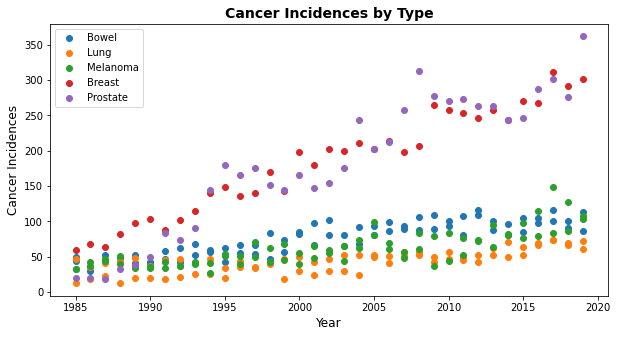

In [10]:
incidence_type()

Scatterplot of 'Cancer Incidences by Sex'

In [11]:
#separating male incidences and 'All Sites'
cancer_allmale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Male'])]
cancer_male = cancer_allmale[cancer_allmale["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

#separating female incidences and 'All Sites'
cancer_allfemale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Female'])]
cancer_female = cancer_allfemale[cancer_allfemale["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

#making scatter plot
def incidence_sex():
    plt.scatter(cancer_male.year, cancer_male.NumberOfCases, c="Blue")
    plt.scatter(cancer_female.year, cancer_female.NumberOfCases, c="Red")
    plt.xlabel('Year', fontsize = 12)
    plt.ylabel('Cancer Incidences', fontsize = 12)
    plt.title('Cancer Incidences by Sex', fontsize = 14, fontweight = "bold")
    plt.legend(['Male', 'Female'])

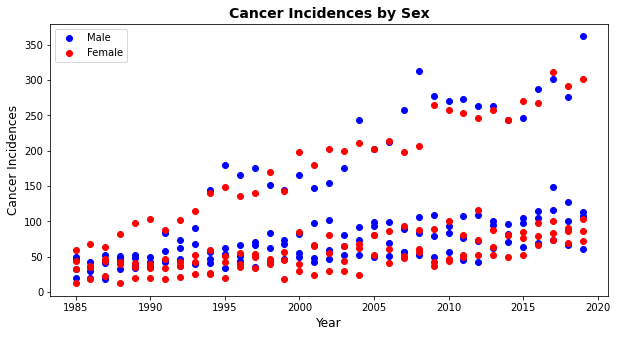

In [12]:
incidence_sex()

Bar Graph of 'Cancer Incidences by Type',  for better visualisation

In [13]:
#adding male incidences
cancer_allmale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Male'])]
cancer_malesum = cancer_allmale['NumberOfCases'].sum()
#adding female incidences
cancer_allfemale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Female'])]
cancer_femalesum = cancer_allfemale['NumberOfCases'].sum()

#making the bar graph
def total_incidence_sex():
        bar_data = {"Sex":["Male", "Female"],
        "Total Incidences":[cancer_malesum, cancer_femalesum]}

        dataFrame = pd.DataFrame(data=bar_data)
        dataFrame.plot.bar(x="Sex", y="Total Incidences", rot=0, color=("Blue", "Red"), legend=False)
        plt.xlabel('Year', fontsize = 12)
        plt.ylabel('Total Incidences', fontsize = 12)
        plt.title('Total Cancer Incidences by Sex', fontsize = 14, fontweight = "bold")

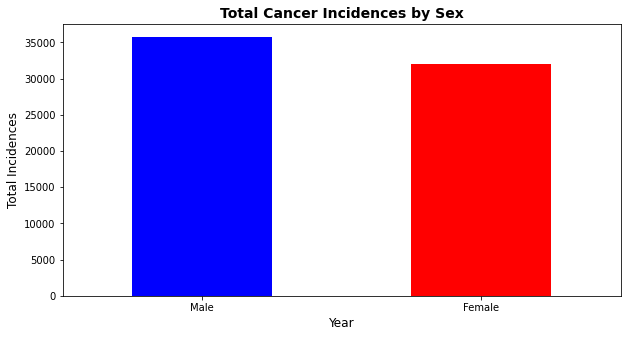

In [14]:
total_incidence_sex()

Bar Graph of 'Total Cancer Incidences by Type'

In [15]:
#creating sums of cancer types
bowel_sum = bowel_incidences["NumberOfCases"].sum()
lung_sum = lung_incidences["NumberOfCases"].sum()
melanoma_sum = melanoma_incidences["NumberOfCases"].sum()
breast_sum = breast_incidences["NumberOfCases"].sum()
prostate_sum = prostate_incidences["NumberOfCases"].sum()

#making the bar graph
def total_incidence_type():
        bar_data = {"Cancer Type":["Bowel","Lung","Melanoma","Breast","Prostate"],
        "Total Incidences":[bowel_sum, lung_sum, melanoma_sum, breast_sum, prostate_sum]}
        dataFrame = pd.DataFrame(data=bar_data)
        dataFrame.plot.bar(x="Cancer Type", y="Total Incidences", rot=0, color=("Blue", "Orange", "Green", "Red", "Purple"), legend=False)
        plt.xlabel('Cancer Type', fontsize = 12)
        plt.ylabel('Total Incidences', fontsize = 12)
        plt.title('Total Cancer Incidences by Type', fontsize = 14, fontweight = "bold")

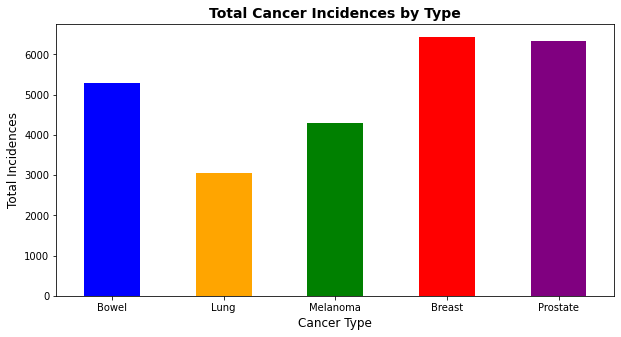

In [16]:
total_incidence_type()

Bar Graph of 'Total Cancer Incidences by Sex and Type'

In [17]:
#creating separating by sex and type
bowel_male = cancer_allmale[cancer_allmale['CancerType'].isin(['Bowel C18-C20'])]
bowel_male_sum = bowel_male['NumberOfCases'].sum()

bowel_female = cancer_allfemale[cancer_allfemale['CancerType'].isin(['Bowel C18-C20'])]
bowel_female_sum = bowel_female['NumberOfCases'].sum()

lung_male = cancer_allmale[cancer_allmale['CancerType'].isin(['Lung C33, C34'])]
lung_male_sum = lung_male['NumberOfCases'].sum()

lung_female = cancer_allfemale[cancer_allfemale['CancerType'].isin(['Lung C33, C34'])]
lung_female_sum = lung_female['NumberOfCases'].sum()

melanoma_male = cancer_allmale[cancer_allmale['CancerType'].isin(['Melanoma of skin C43'])]
melanoma_male_sum = melanoma_male['NumberOfCases'].sum()

melanoma_female = cancer_allfemale[cancer_allfemale['CancerType'].isin(['Melanoma of skin C43'])]
melanoma_female_sum = melanoma_female['NumberOfCases'].sum()

breast_male = cancer_allmale[cancer_allmale['CancerType'].isin(['Breast C50'])]
breast_male_sum = breast_male['NumberOfCases'].sum()

breast_female = cancer_allfemale[cancer_allfemale['CancerType'].isin(['Breast C50'])]
breast_female_sum = breast_female['NumberOfCases'].sum()

prostate_male = cancer_allmale[cancer_allmale['CancerType'].isin(['Prostate C61'])]
prostate_male_sum = prostate_male['NumberOfCases'].sum()

prostate_female = cancer_allfemale[cancer_allfemale['CancerType'].isin(['Prostate C61'])]
prostate_female_sum = prostate_female['NumberOfCases'].sum()


#making the bar graph
def total_incidence_sex_type():
        bar_data = {"Male":[bowel_male_sum, lung_male_sum, melanoma_male_sum, breast_male_sum, prostate_male_sum],
        "Female":[bowel_female_sum, lung_female_sum, melanoma_female_sum, breast_female_sum, prostate_female_sum]}

        index     = ["Bowel", "Lung", "Melanoma", "Breast", "Prostate"]

        dataFrame = pd.DataFrame(data=bar_data, index=index)

        dataFrame.plot.bar(rot=0, color=("Blue", "Red") )


        plt.xlabel('Cancer Type', fontsize = 12)
        plt.ylabel('Total Incidences', fontsize = 12)
        plt.title('Total Cancer Incidences by Sex and Type', fontsize = 14, fontweight = "bold")

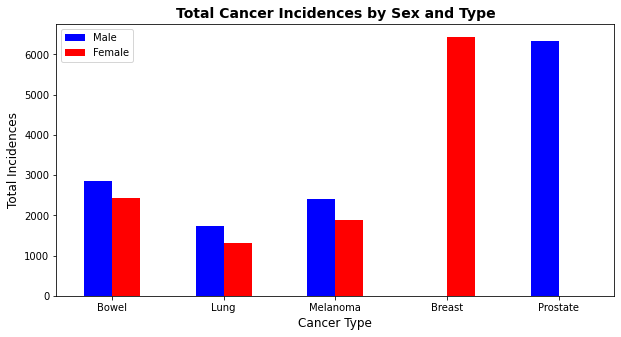

In [18]:
total_incidence_sex_type()

Bar Graph of 'Total Cancer Incidences and Mortalities by Sex'

In [19]:
#adding male mortalities
mortality_allmale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Mortality Male'])]
mortality_malesum = mortality_allmale['NumberOfCases'].sum()
#adding female mortalities
mortality_allfemale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Mortality Female'])]
mortality_femalesum = mortality_allfemale['NumberOfCases'].sum()

#making the bar graph
def total_incidence_mortality():
        bar_data = {"Incidences":[cancer_malesum, cancer_femalesum],
        "Mortalities":[mortality_malesum, mortality_femalesum]}
        index = ["Male", "Female"]
        dataFrame = pd.DataFrame(data=bar_data, index=index)
        dataFrame.plot.bar(rot=0, color=("seagreen", "orangered"))
        plt.xlabel('Sex', fontsize = 12)
        plt.ylabel('Total Incidences and Mortalities', fontsize = 12)
        plt.title('Total Cancer Incidences and Mortalities by Sex', fontsize = 14, fontweight = "bold")

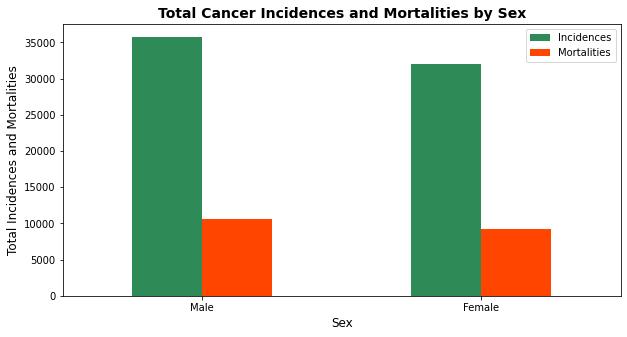

In [20]:
total_incidence_mortality()

Scatterplot of 'Cancer Mortalites by Type'

In [21]:
#removing the sex labelled as 'person' to decrease data ambiguity
cancer_male_female_mortality = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Mortality Male', 'Mortality Female'])]

#removing cancer from 'All sites' again to decrease ambiguity
cancer_mortalities = cancer_male_female_mortality[cancer_male_female_mortality["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

#plotting bowel cancer

bowel_mortalities = cancer_mortalities[cancer_mortalities["CancerType"].isin(["Bowel C18-C20"])]
lung_mortalities = cancer_mortalities[cancer_mortalities["CancerType"].isin(["Lung C33, C34"])]
breast_mortalities = cancer_mortalities[cancer_mortalities["CancerType"].isin(["Breast C50"])]
prostate_mortalities = cancer_mortalities[cancer_mortalities["CancerType"].isin(["Prostate C61"])]

def mortalities_type():
    plt.scatter(bowel_mortalities.year, bowel_mortalities.NumberOfCases)
    plt.scatter(lung_mortalities.year, lung_mortalities.NumberOfCases)
    plt.scatter(breast_mortalities.year, breast_mortalities.NumberOfCases)
    plt.scatter(prostate_mortalities.year, prostate_mortalities.NumberOfCases)
    plt.xlabel('Year', fontsize = 12)
    plt.ylabel('Cancer Mortalites', fontsize = 12)
    plt.title('Cancer Mortalites by Type', fontsize = 14, fontweight = "bold")
    plt.legend(['Bowel', 'Lung', 'Breast', 'Prostate'])


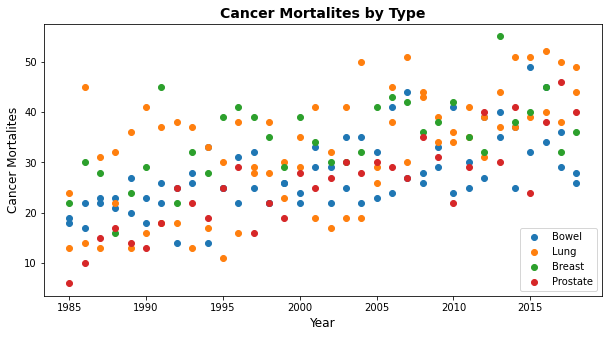

In [22]:
mortalities_type()

Bar Graph of 'Total Cancer Mortalities by Sex and Type'

In [23]:
#adding male mortalities
mortality_allmale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Mortality Male'])]
mortality_malesum = mortality_allmale['NumberOfCases'].sum()
#adding female mortalities
mortality_allfemale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Mortality Female'])]
mortality_femalesum = mortality_allfemale['NumberOfCases'].sum()


#creating separating by sex and type
bowel_mortalitymale = mortality_allmale[mortality_allmale['CancerType'].isin(['Bowel C18-C20'])]
bowel_mortalitymale_sum = bowel_mortalitymale['NumberOfCases'].sum()

bowel_mortalityfemale = mortality_allfemale[mortality_allfemale['CancerType'].isin(['Bowel C18-C20'])]
bowel_mortalityfemale_sum = bowel_mortalityfemale['NumberOfCases'].sum()

lung_mortalitymale = mortality_allmale[mortality_allmale['CancerType'].isin(['Lung C33, C34'])]
lung_mortalitymale_sum = lung_mortalitymale['NumberOfCases'].sum()

lung_mortalityfemale = mortality_allfemale[mortality_allfemale['CancerType'].isin(['Lung C33, C34'])]
lung_mortalityfemale_sum = lung_mortalityfemale['NumberOfCases'].sum()

breast_mortalitymale = mortality_allmale[mortality_allmale['CancerType'].isin(['Breast C50'])]
breast_mortalitymale_sum = breast_mortalitymale['NumberOfCases'].sum()

breast_mortalityfemale = mortality_allfemale[mortality_allfemale['CancerType'].isin(['Breast C50'])]
breast_mortalityfemale_sum = breast_mortalityfemale['NumberOfCases'].sum()

prostate_mortalitymale = mortality_allmale[mortality_allmale['CancerType'].isin(['Prostate C61'])]
prostate_mortalitymale_sum = prostate_mortalitymale['NumberOfCases'].sum()

prostate_mortalityfemale = mortality_allfemale[mortality_allfemale['CancerType'].isin(['Prostate C61'])]
prostate_mortalityfemale_sum = prostate_mortalityfemale['NumberOfCases'].sum()


#making the bar graph
def mortalities_sex_type():
        bar_data = {"Male":[bowel_mortalitymale_sum, lung_mortalitymale_sum, breast_mortalitymale_sum, prostate_mortalitymale_sum],
                "Female":[bowel_mortalityfemale_sum, lung_mortalityfemale_sum, breast_mortalityfemale_sum, prostate_mortalityfemale_sum]}

        index     = ["Bowel", "Lung", "Breast", "Prostate"]

        dataFrame = pd.DataFrame(data=bar_data, index=index)

        dataFrame.plot.bar(rot=0, color=("Blue", "Red"))

        plt.xlabel('Cancer Type', fontsize = 12)
        plt.ylabel('Total Mortalities', fontsize = 12)
        plt.title('Total Cancer Mortalities by Sex and Type', fontsize = 14, fontweight = "bold")



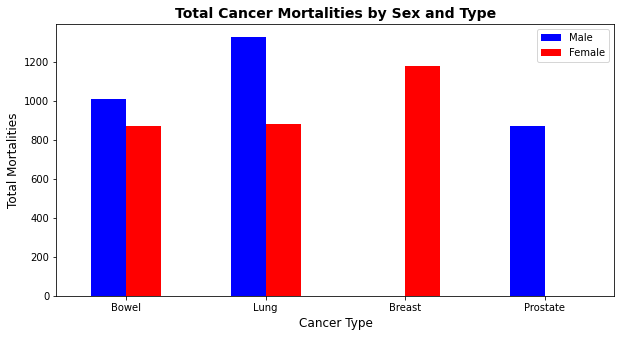

In [24]:
mortalities_sex_type()

Box Plot of 'Distribution of Lung Cancer Mortalities by Sex'

In [25]:
#making bowel mortalities list by sex
lung_mortalities_male = lung_mortalities[lung_mortalities["sex"].isin(["Male"])]
lung_mortalities_malenumbers = lung_mortalities_male['NumberOfCases'] 

lung_mortalities_female = lung_mortalities[lung_mortalities["sex"].isin(["Female"])]
lung_mortalities_femalenumbers = lung_mortalities_female['NumberOfCases']

#doing box plot
def lung_boxplot():
    data = pd.DataFrame({"Male": lung_mortalities_malenumbers, "Female": lung_mortalities_femalenumbers})
    boxes = data[['Male', 'Female']].plot(kind='box', title='boxplot', vert=False, patch_artist=True)
    labels = ['Male', 'Female']
    plt.xlabel('Cancer Mortalites', fontsize = 12)
    plt.title('Distribution of Lung Cancer Mortalities by Sex', fontsize = 14, fontweight = "bold")


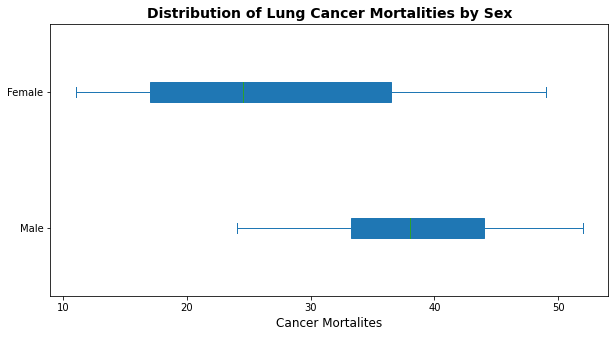

In [26]:
lung_boxplot()

Box Plot of 'Distribution of Bowel Cancer Mortalities by Sex'

In [27]:
#making bowel mortalities list by sex
bowel_mortalities_male = bowel_mortalities[bowel_mortalities["sex"].isin(["Male"])]
bowel_mortalities_malenumbers = bowel_mortalities_male['NumberOfCases'] 

bowel_mortalities_female = bowel_mortalities[bowel_mortalities["sex"].isin(["Female"])]
bowel_mortalities_femalenumbers = bowel_mortalities_female['NumberOfCases']

#doing box plot
def bowel_boxplot():
    data = pd.DataFrame({"Male": bowel_mortalities_malenumbers, "Female": bowel_mortalities_femalenumbers})
    boxes = data[['Male', 'Female']].plot(kind='box', title='boxplot', vert=False, patch_artist=True)
    labels = ['Male', 'Female']
    plt.xlabel('Cancer Mortalites', fontsize = 12)
    plt.title('Distribution of Bowel Cancer Mortalities by Sex', fontsize = 14, fontweight = "bold")


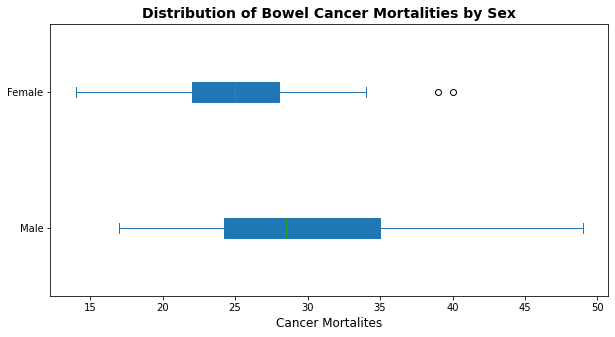

In [28]:
bowel_boxplot()

In [29]:
if os.path.isfile("aihw-phe-221-data-by-region-APRIL-2022_1.xlsx"):
    filepath = "aihw-phe-221-data-by-region-APRIL-2022_1.xlsx"
    print("loading from file")
else:
    filepath = "https://www.aihw.gov.au/reports/alcohol/alcohol-tobacco-other-drugs-australia/contents/data-by-region/tobacco-smoking"
    print("loading from the internet")

lungcancer_data = pd.read_csv(filepath, header=0, delim_whitespace=True)
print("done")

loading from file
done


In [32]:
#couldn't figure out how to get the data in so i just typed the values 😰
Year = [2001, 2004, 2007,2010, 2013, 2016, 2019]
Daily = [18.4, 16.2, 14.7, 11, 9, 9.5, 8.2]
Occasional = [4.2, 4.6, 2.5, 2.8, 2.5, 2.1, 1.8]
ExSmoker = [27.7, 25.6, 24.8, 24.9, 22.5, 22.8, 20.8]
NeverSmoked = [49.8, 53.6, 57.9, 61.2, 65.3, 65.5, 69.2]

def tobacco_usage():
    plt.plot(Year, Daily)
    plt.plot(Year, Occasional)
    plt.plot(Year, ExSmoker)
    plt.plot(Year, NeverSmoked)
    plt.xlabel('Year', fontsize = 12)
    plt.ylabel('Percentage', fontsize = 12)
    plt.title('Tobacco Usage Data in the ACT Ages 14+, 2001-2019', fontsize = 14, fontweight = "bold")
    plt.legend(['Daily', 'Occasional', 'Ex Smoker', 'Never Smoked'])

Line Graph of 'Tobacco Usage Data in the ACT'

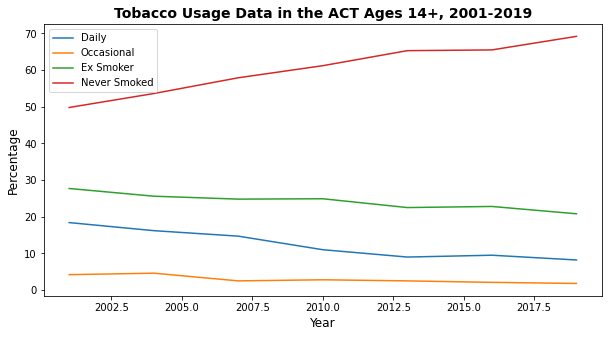

In [33]:
tobacco_usage()

Thanks for watching!